# Indian Startup funding EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('startup_funding.csv')


In [13]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [15]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [19]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [21]:
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [27]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [29]:
df.shape

(3044, 10)

In [35]:
#dropping unnecessary columns
df.drop(columns=['Sr No','Remarks'],inplace=True)

In [37]:
#checking missing values
df.isna().sum()


Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        960
dtype: int64

In [57]:
#replacing columns name to make easy to work
df.rename(columns={
        'Date dd/mm/yyyy':'date',
    'Startup Name':'startups',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'location',
    'Investors Name':'investor',
    'Amount in USD':'amount',
    'InvestmentnType':'investment round'
},inplace=True)


In [59]:
df.columns

Index(['date', 'startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount'],
      dtype='object')

In [61]:
df.isnull().sum()

date                  0
startups              0
vertical            171
subvertical         936
location            180
investor             24
investment round      4
amount              960
dtype: int64

In [63]:
#checking duplicate values
df.duplicated().sum()

0

In [65]:
#handling missing values of amount,filling it with 0
df['amount']=df['amount'].fillna('0')


In [67]:
#number of unique values in amount
df['amount'].nunique()

472

In [69]:
df['amount'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [75]:
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')

In [81]:
df=df[df['amount'].str.isdigit()]

In [83]:
df['amount']=df['amount'].astype('float64')

In [89]:
df.dtypes

date                 object
startups             object
vertical             object
subvertical          object
location             object
investor             object
investment round     object
amount              float64
dtype: object

In [91]:
df['amount']

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            0.0
3043       140000.0
Name: amount, Length: 3029, dtype: float64

In [97]:
df['date'].unique()

array(['09/01/2020', '13/01/2020', '02/01/2020', ..., '29/01/2015',
       '30/01/2015', '31/01/2015'], dtype=object)

In [99]:
df['date']=df['date'].str.replace('05/072018','05/07/2018')
df['date']=df['date'].str.replace('15-01-07 00:00:00','15/01/07')

In [101]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [103]:
#we are using deletion method for misssing text data handling
df.dropna(subset=['date','location','subvertical','vertical','investor','investment round'],inplace=True)

In [105]:
 # now in this dataset null value is 0
df.isnull().sum()

date                0
startups            0
vertical            0
subvertical         0
location            0
investor            0
investment round    0
amount              0
dtype: int64

In [107]:
df

,date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
...,...,...,...,...,...,...,...,...
2035,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0
2036,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0
2037,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0
2038,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0


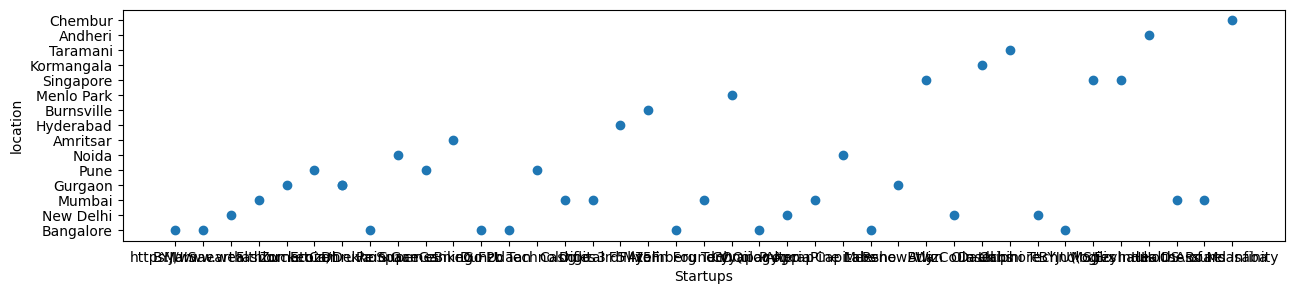

In [236]:
plt.figure(figsize=(15,3))
plt.scatter(df.head(40)['startups'],df.head(40)['location'])
plt.xlabel("Startups")
plt.ylabel("location")
plt.show()

In [248]:
def hist_plot(variable):
    var=df[variable]
    varvalue=var.value_counts()
    plt.figure(figsize=(9,3))
    plt.hist(var)
    plt.xticks(varvalue.index,varvalue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varvalue))

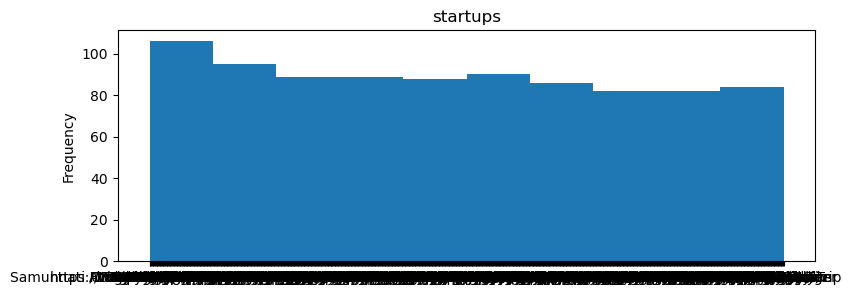

startups: 
 startups
Meesho           5
Moglix           4
Droom            3
GOQii            3
Capital Float    3
                ..
Minjar           1
Clip App         1
Upwardly.in      1
Autorox.co       1
Happy2Refer      1
Name: count, Length: 824, dtype: int64


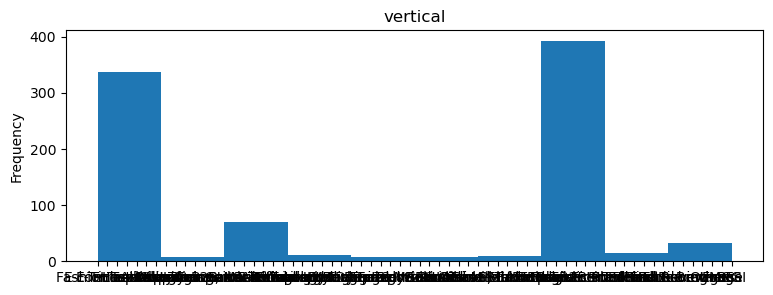

vertical: 
 vertical
Consumer Internet    365
Technology           198
E-commerce           131
healthcare            36
Finance               26
                    ... 
Services               1
Fintech                1
AI                     1
Social Media           1
BFSI                   1
Name: count, Length: 66, dtype: int64


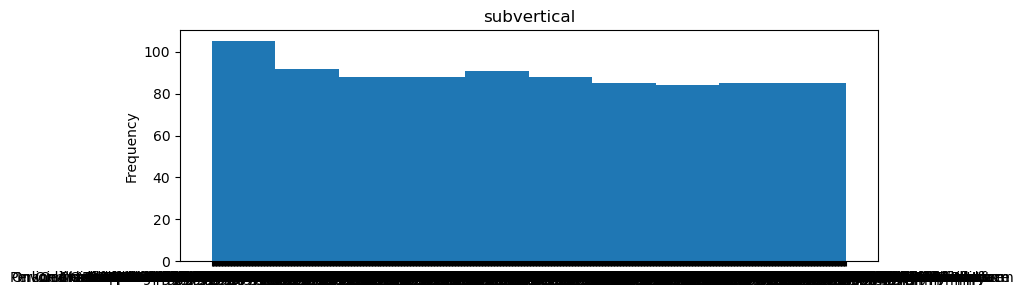

subvertical: 
 subvertical
Online Lending Platform                          7
Food Delivery Platform                           5
E-learning                                       3
Online lending platform                          3
Online platform for Higher Education Services    3
                                                ..
Hyperlocal home services provider                1
Cloud Solutions provider                         1
Digital Media Video platform                     1
MF investment platform                           1
Mobile based Referral Platform                   1
Name: count, Length: 847, dtype: int64


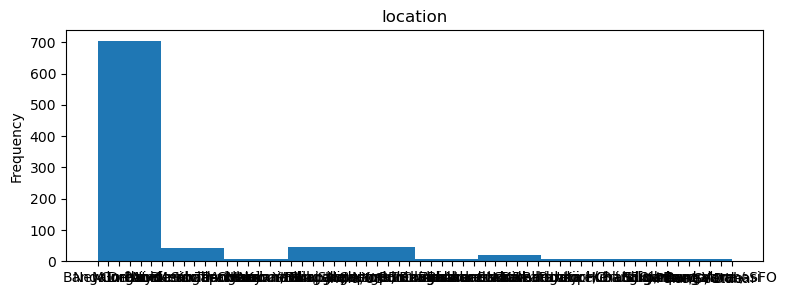

location: 
 location
Bangalore              256
Mumbai                 172
New Delhi              119
Gurgaon                 85
Pune                    40
Chennai                 36
Hyderabad               34
Noida                   31
Gurugram                22
Delhi                   10
Jaipur                  10
Ahmedabad               10
Kolkata                  6
Singapore                5
Indore                   5
Vadodara                 3
Nagpur                   2
Goa                      2
Bhopal                   2
SFO / Bangalore          1
Nw Delhi                 1
Trivandrum               1
Panaji                   1
Bangalore / SFO          1
Udupi                    1
Kochi                    1
Bangalore/ Bangkok       1
Pune / Dubai             1
Kanpur                   1
Pune/Seattle             1
Hubli                    1
London                   1
US                       1
Chandigarh               1
Siliguri                 1
Lucknow                  1
Kerala 

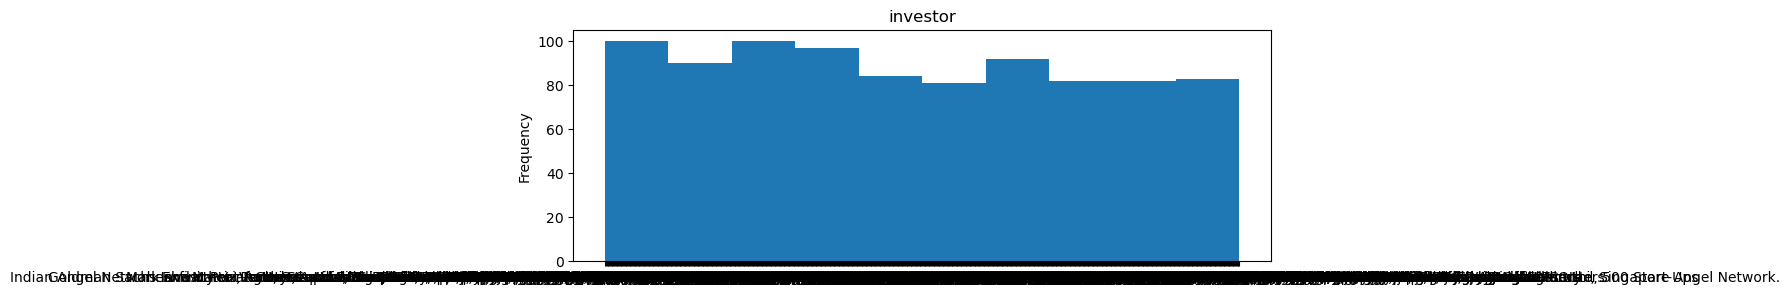

investor: 
 investor
Undisclosed Investors                                                                                           12
Undisclosed investors                                                                                           12
Ratan Tata                                                                                                       6
undisclosed investors                                                                                            5
Venture Catalysts                                                                                                5
                                                                                                                ..
R. Jayakumar, Vaibhav Vohra, Aditya Vazirani, Rhea Vazirani, AVN Business Solutions, Dreamweaver Investments     1
Rahul Dev Kumar, Rajesh Mahajan, Ankit Sharma and others                                                         1
Venugopal Dhoot, Ajay Bhatia, Tarun Khandelwal, Ganpat Sing

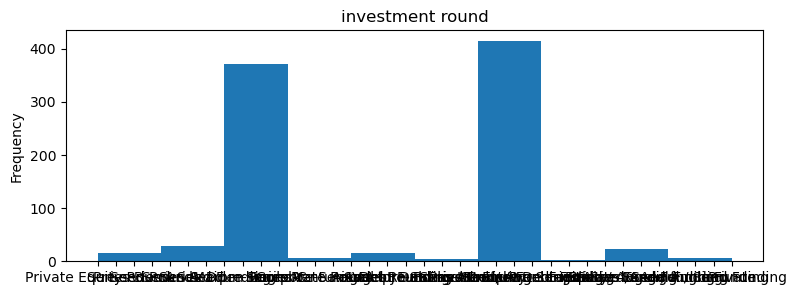

investment round: 
 investment round
Private Equity                 389
Seed Funding                   362
Seed/ Angel Funding             23
Series A                        16
Seed / Angel Funding            15
Debt Funding                    13
Series D                        10
Series C                         8
Series B                         8
Seed/Angel Funding               7
Private Equity Round             4
Angel / Seed Funding             4
Pre-Series A                     4
Seed Round                       3
Seed                             3
pre-Series A                     2
Angel Round                      1
Series J                         1
Pre-series A                     1
Seed / Angle Funding             1
Seed funding                     1
Maiden Round                     1
pre-series A                     1
Private Funding                  1
Series E                         1
Equity                           1
Debt-Funding                     1
Pre Series A      

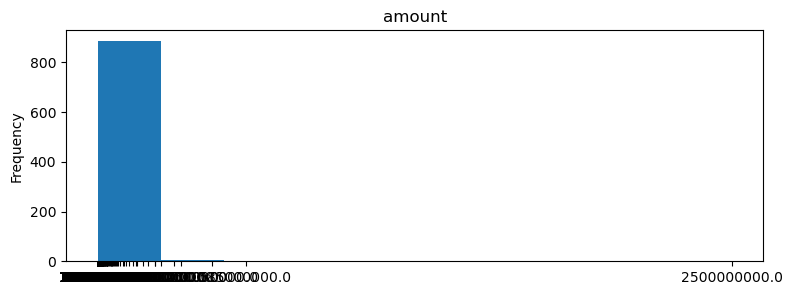

amount: 
 amount
0.0           283
1000000.0      55
500000.0       30
5000000.0      19
3000000.0      19
             ... 
935089.0        1
15700000.0      1
4700000.0       1
1930000.0       1
16500000.0      1
Name: count, Length: 222, dtype: int64


In [250]:
columns_plot=['startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount']
for i in columns_plot:
   hist_plot(i)

# Top 10 funding rais company

In [110]:
funding_overview=df.groupby('startups')['amount'].sum()

In [112]:
funding_overview = funding_overview[funding_overview>0]

In [114]:
top_10_Funding_rais=funding_overview.sort_values(ascending=False).head(10)

In [116]:
top_10_Funding_rais=pd.DataFrame(top_10_Funding_rais)

In [118]:
top_10_Funding_rais=top_10_Funding_rais.reset_index()

In [120]:
top_10_Funding_rais

,startups,amount
0,Flipkart,2.500000e+09
1,Udaan,8.100000e+08
2,GOQii,4.500000e+08
3,Ola,4.345000e+08
4,Zomato,3.500000e+08
5,BigBasket,3.000000e+08
6,OYO Rooms,2.500000e+08
7,Zilingo,2.340000e+08
8,Paytm Marketplace,2.000000e+08
9,CarDekho,2.000000e+08


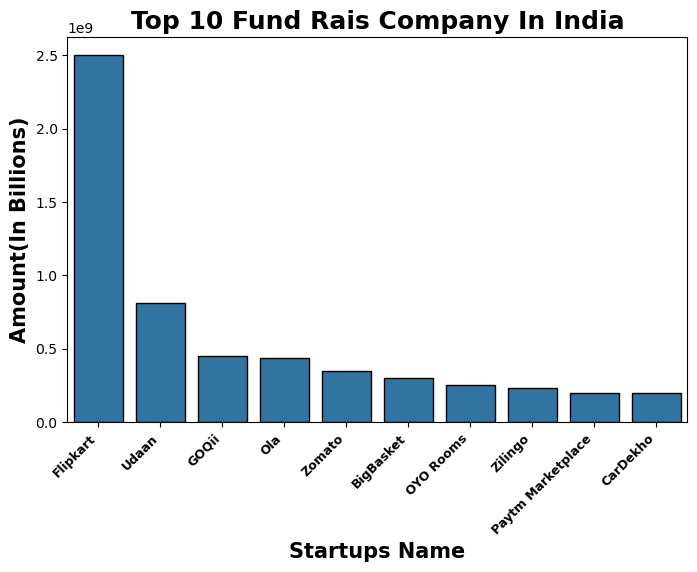

In [122]:
plt.figure(figsize=(8,5))
sns.barplot(x='startups',y='amount',data=top_10_Funding_rais,edgecolor='black')
plt.title('Top 10 Fund Rais Company In India',fontsize=18,weight='bold')
plt.xlabel('Startups Name',fontsize=15,weight='bold')
plt.ylabel('Amount(In Billions)',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')
plt.show()

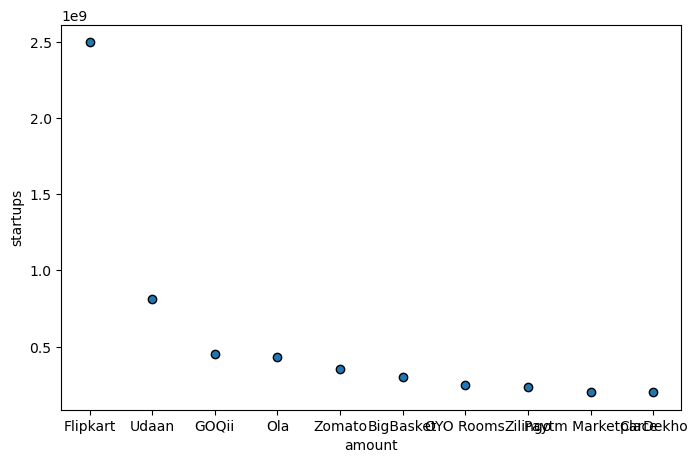

In [130]:
plt.figure(figsize=(8,5))
plt.scatter(x='startups',y='amount',data=top_10_Funding_rais,edgecolor='black')
plt.xlabel("amount")
plt.ylabel("startups")
plt.show()

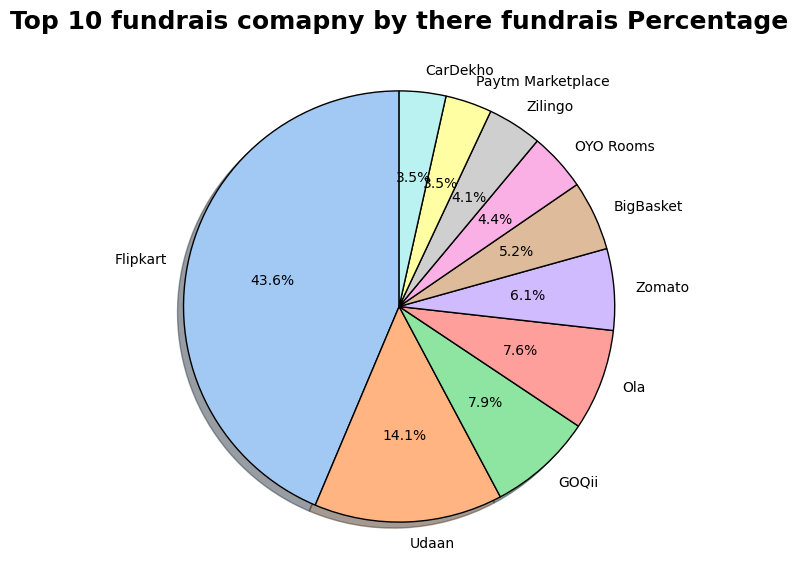

In [149]:
plt.figure(figsize=(7,7))
plt.pie(top_10_Funding_rais['amount'], labels=top_10_Funding_rais['startups'], autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'),shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 fundrais comapny by there fundrais Percentage', fontsize=18, weight='bold')


plt.show()

<Axes: ylabel='amount'>

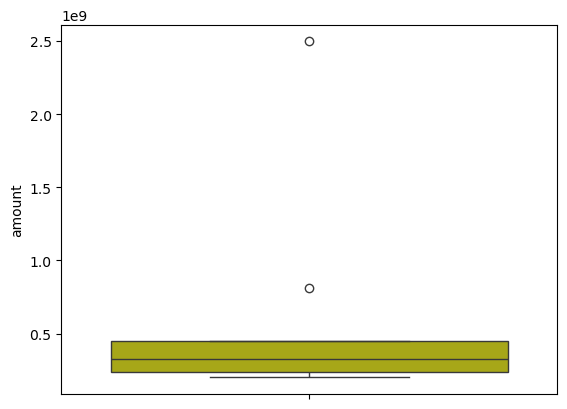

In [181]:
sns.boxplot(y='amount',
         
            data=top_10_Funding_rais,
            color='y'
           )

# Top 5 E-Commerse Company

In [133]:
df['vertical'].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'E-Commerce', 'Aerospace', 'Gaming',
       'Video Games', 'Last Mile Transportation', 'Customer Service',
       'B2B', 'Advertising, Marketing', 'SaaS', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'Finance', 'Compliance',
       'Transport', 'Artificial Intelligence', 'Food and Beverage',
       'EdTech', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Energy', 'Digital Media',
       'Transportation', 'Services', 'Saas', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, Ecommerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-

In [135]:
df['vertical']=df['vertical'].str.replace('E-Commerce','E-commerce')
df['vertical']=df['vertical'].str.replace('Ecommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('ECommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommece','E-commerce')

In [137]:
E_commerce=df[df['vertical'] == 'E-commerce'][['startups','amount']]
E_commerce = E_commerce[E_commerce['amount'] > 0]
Top10_E_commers_company=E_commerce.sort_values(by='amount',ascending=False).head(10)

In [139]:
Top10_E_commers_company=Top10_E_commers_company.groupby('startups')['amount'].sum()

In [141]:
Top5_E_commers_company=pd.DataFrame(Top10_E_commers_company).sort_values(by='amount',ascending=False).head(5).reset_index()

In [143]:
Top5_E_commers_company

,startups,amount
0,Flipkart,2.500000e+09
1,Zilingo,2.260000e+08
2,Paytm Marketplace,2.000000e+08
3,Meesho,1.750000e+08
4,Shopclues,1.000000e+08


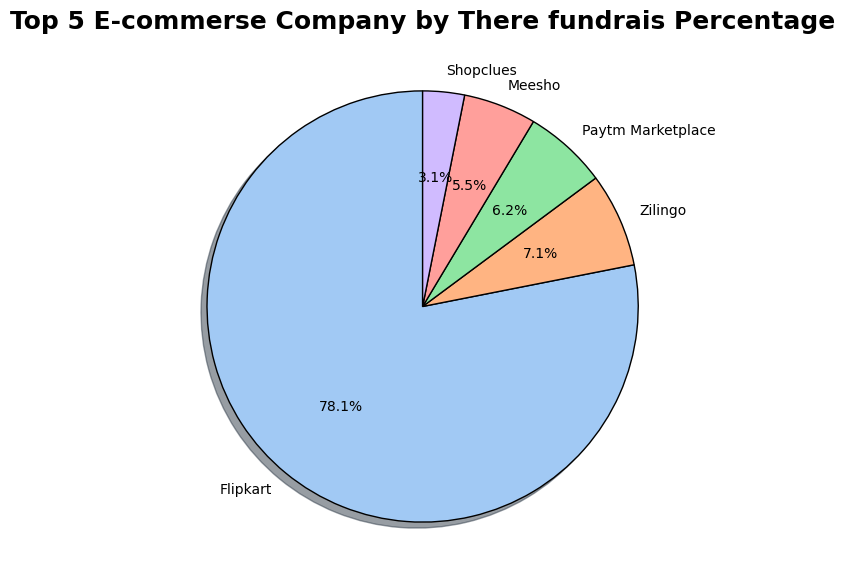

In [183]:
plt.figure(figsize=(7,7))
plt.pie(Top5_E_commers_company['amount'], labels=Top5_E_commers_company['startups'], autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'),shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 E-commerse Company by There fundrais Percentage', fontsize=18, weight='bold')


plt.show()

# Top 10 Healthcare Company


In [186]:
df['vertical'].unique()


array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'Aerospace', 'Gaming', 'Video Games',
       'Last Mile Transportation', 'Customer Service', 'B2B',
       'Advertising, Marketing', 'SaaS', 'IoT', 'Information Technology',
       'Consumer Technology', 'Health and Wellness', 'Accounting',
       'Finance', 'Compliance', 'Transport', 'Artificial Intelligence',
       'Food and Beverage', 'EdTech', 'Tech', 'Health Care',
       'Luxury Label', 'Waste Management Service', 'Deep-Tech', 'Energy',
       'Digital Media', 'Transportation', 'Services', 'Saas', 'Fintech',
       'Edtech', 'AI', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, E-commerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-Tech',
       'IT', 'Fiinance', '

In [188]:
df['vertical']=df['vertical'].str.replace('Health and wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Health and Wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Healthcare','healthcare')
df['vertical']=df['vertical'].str.replace('Health Care','healthcare')

In [192]:
Helthcare=df[df['vertical'] == 'healthcare'][['startups','amount']]
Helthcare =Helthcare[Helthcare['amount'] > 0]
Top10_Helthcare_company=Helthcare.sort_values(by='amount',ascending=False).head(10)

In [196]:
Top10_Helthcare_company

,startups,amount
42,GOQii,450000000.0
358,Shape,100000000.0
856,Healthcare at Home,40000000.0
117,Vyome Therapeutics Inc.,22000000.0
353,Asia Institute Of Medical Science,21000000.0
868,Medwell Ventures,21000000.0
939,iGenetics,19500000.0
360,healthifyme,12000000.0
321,MedGenome,10000000.0
582,OncoStem,6000000.0


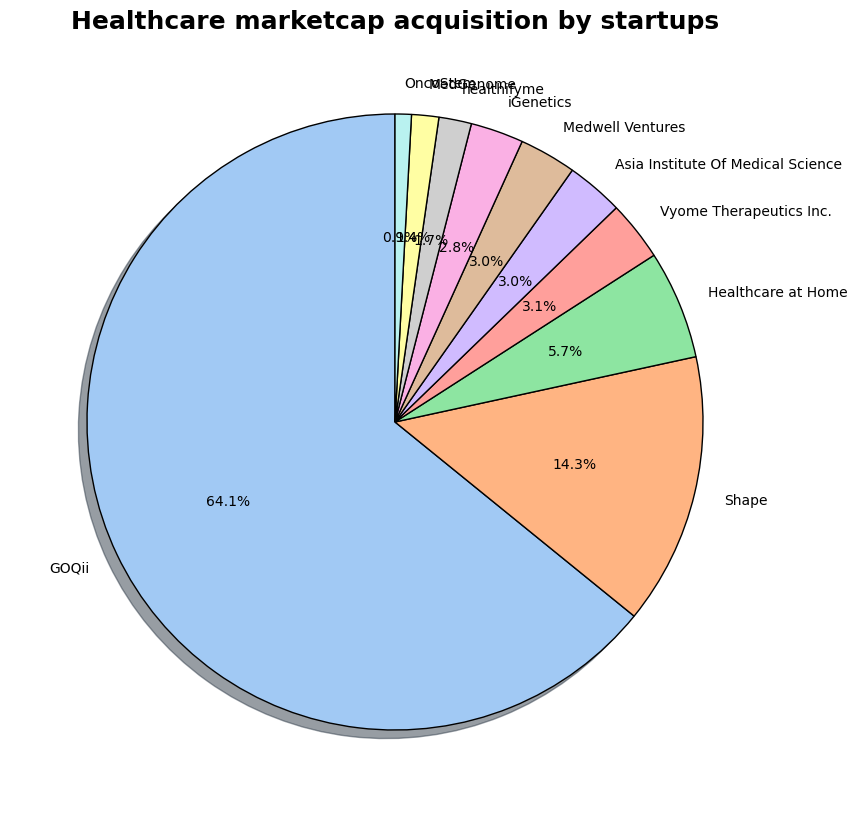

In [202]:
plt.figure(figsize=(10,10))
plt.pie(Top10_Helthcare_company['amount'], labels=Top10_Helthcare_company['startups'], autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'),shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Healthcare marketcap acquisition by startups', fontsize=18, weight='bold')


plt.show()

# Top 5 Startups Friendly Locations in india

In [207]:
df['location'].unique()


array(['Bengaluru', 'New Delhi', 'Mumbai', 'Gurgaon', 'Pune', 'Noida',
       'Amritsar', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Singapore',
       'Kormangala', 'Taramani', 'Andheri', 'Chembur', 'Haryana',
       'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Delhi', 'Bhopal',
       'Gurugram', 'India/Singapore', 'Jaipur', 'India/US', 'Chennai',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Rourkela', 'Srinagar',
       'Bhubneswar', 'Coimbatore', 'Bangalore', 'Faridabad', 'Ahemdabad',
       'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa', 'Nw Delhi', 'Kolkata',
       'Trivandrum', 'Vadodara', 'Panaji', 'Udupi', 'Kochi',
       'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'US', 'Chandigarh',
       'Siliguri', 'Lucknow', 'Kanpur', 'SFO / Bangalore', 'London',
       'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi'], dtype=object)

In [211]:
df['location']=df['location'].str.replace('Bengaluru','Bangalore')
df['vertical']=df['vertical'].str.replace('Bengaluru and Gurugram','Bangalore')
df['vertical']=df['vertical'].str.replace('New York, Bengaluru','Bangalore')
df['vertical']=df['vertical'].str.replace('Bangalore/ Bangkok','Bangalore')
df['vertical']=df['vertical'].str.replace('SFO / Bangalore','Bangalore')
df['location']=df['location'].str.replace('Seattle / Bangalore','Bangalore')
df['vertical']=df['vertical'].str.replace('Bangalore / SFO','Bangalore')
df['vertical']=df['vertical'].str.replace('Mumbai/Bengaluru','Mumbai')
df['vertical']=df['vertical'].str.replace('Mumbai / UK','Mumbai')
df['vertical']=df['vertical'].str.replace('New Delhi / US','New Delhi')
df['vertical']=df['vertical'].str.replace('Pune / Dubai','Pune')
df['vertical']=df['vertical'].str.replace('Pune/Seattle','Pune')
df['vertical']=df['vertical'].str.replace('New Delhi / US','New Delhi')

In [213]:
Top_5_startupsfriendly_locations=df.groupby('location')['startups'].size().reset_index(name='num_startups').sort_values(by='num_startups',ascending=False).head(5)

In [215]:
Top_5_startupsfriendly_locations

,location,num_startups
4,Bangalore,256
36,Mumbai,172
39,New Delhi,119
18,Gurgaon,85
45,Pune,40


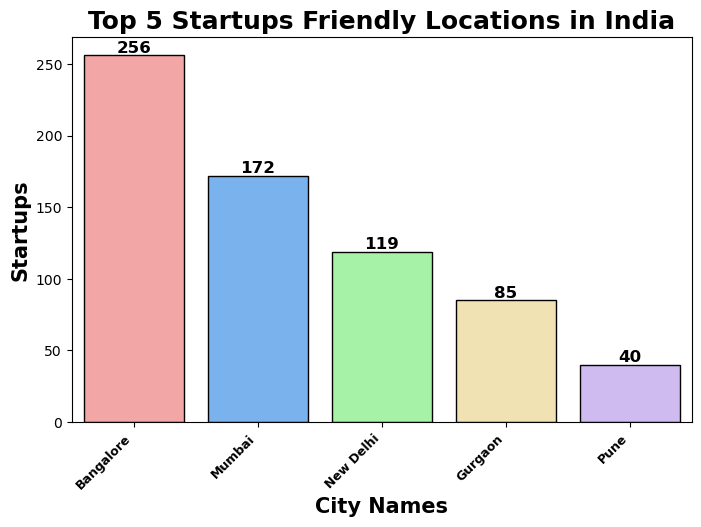

In [217]:
plt.figure(figsize=(8,5))
sns.barplot(x='location',y='num_startups',data=Top_5_startupsfriendly_locations,palette= 
            ['#FF9999', '#66B2FF', '#99FF99','#fbe7aa','#cdb2f8'],edgecolor='black')
plt.title('Top 5 Startups Friendly Locations in India',fontsize=18,weight='bold')
plt.xlabel('City Names',fontsize=15,weight='bold')
plt.ylabel('Startups',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')

for i in range(len(Top_5_startupsfriendly_locations)):
  
    plt.text(i, Top_5_startupsfriendly_locations['num_startups'].iloc[i],  # X and Y coordinates
             f"{Top_5_startupsfriendly_locations['num_startups'].iloc[i]:,}",  # Text to display
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()